### Sentiment analysis: The Happy Prince by Oscar Wilde

In [1]:
# Read in the locally saved text file
with open('happy_prince.txt', 'r') as myfile:
    text=myfile.read().replace('\n', ' ')

print(type(text)) # check the data type
print(text[0:500]) # print the first n characters of the string

<class 'str'>
HIGH above the city, on a tall column, stood the statue of the Happy Prince.  He was gilded all over with thin leaves of fine gold, for eyes he had two bright sapphires, and a large red ruby glowed on his sword-hilt.  He was very much admired indeed.  “He is as beautiful as a weathercock,” remarked one of the Town Councillors who wished to gain a reputation for having artistic tastes; “only not quite so useful,” he added, fearing lest people should think him unpractical, which he really was not.


In [2]:
# Import the the NLTK package and the sentence tokenizer function
import nltk
from nltk import sent_tokenize

In [3]:
# Tokenize into sentences
sentences = sent_tokenize(text)
print("Number of sentences in the novel:", len(sentences))
print(type(sentences)) # check the data type

# Print out a few sentences in the list
for i in range(5):
    print(sentences[i], '\n')

Number of sentences in the novel: 168
<class 'list'>
HIGH above the city, on a tall column, stood the statue of the Happy Prince. 

He was gilded all over with thin leaves of fine gold, for eyes he had two bright sapphires, and a large red ruby glowed on his sword-hilt. 

He was very much admired indeed. 

“He is as beautiful as a weathercock,” remarked one of the Town Councillors who wished to gain a reputation for having artistic tastes; “only not quite so useful,” he added, fearing lest people should think him unpractical, which he really was not. 

“Why can’t you be like the Happy Prince?” asked a sensible mother of her little boy who was crying for the moon. 



In [4]:
# Import the VADER sentiment analysis tool

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [5]:
# Look at the sentiment scores for a few sentences

for i in [1,3,15]:
    print(sentences[i])
    vs = analyzer.polarity_scores(sentences[i])
    print("\n\t" + str(vs) + "\n\n")

He was gilded all over with thin leaves of fine gold, for eyes he had two bright sapphires, and a large red ruby glowed on his sword-hilt.

	{'neg': 0.0, 'neu': 0.836, 'pos': 0.164, 'compound': 0.5719}


“He is as beautiful as a weathercock,” remarked one of the Town Councillors who wished to gain a reputation for having artistic tastes; “only not quite so useful,” he added, fearing lest people should think him unpractical, which he really was not.

	{'neg': 0.077, 'neu': 0.771, 'pos': 0.152, 'compound': 0.5574}


“It is a ridiculous attachment,” twittered the other Swallows; “she has no money, and far too many relations”; and indeed the river was quite full of Reeds.

	{'neg': 0.164, 'neu': 0.836, 'pos': 0.0, 'compound': -0.5719}




In [6]:
# Determine the complete score for each sentence sentence
complete_score = [analyzer.polarity_scores(sentence) for sentence in sentences]

# Select just the last value ('compound' or polarity of the sentence)
polarity = [line.get('compound') for line in complete_score]

In [7]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd # just in case we need it later
import seaborn as sns # for styling

%matplotlib inline

# Settings for all figures
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['font.size'] = 14
plt.rcParams['legend.fontsize'] = 12

In [8]:
# Define a running mean function that averages over 
# a given window of width N (width = number of sentences)

# function, give it x (list of sentiment values, window N)
def running_mean(x, N): 
    run_sum = np.cumsum(np.insert(x,0,0))
    return(run_sum[N:]-run_sum[:-N])/N

In [9]:
polarity_sml = running_mean(polarity, 5)
xval_sml = [index*100/len(polarity_sml) for index in range(len(polarity_sml))]

xval = [index*100/len(polarity) for index in range(len(polarity))]

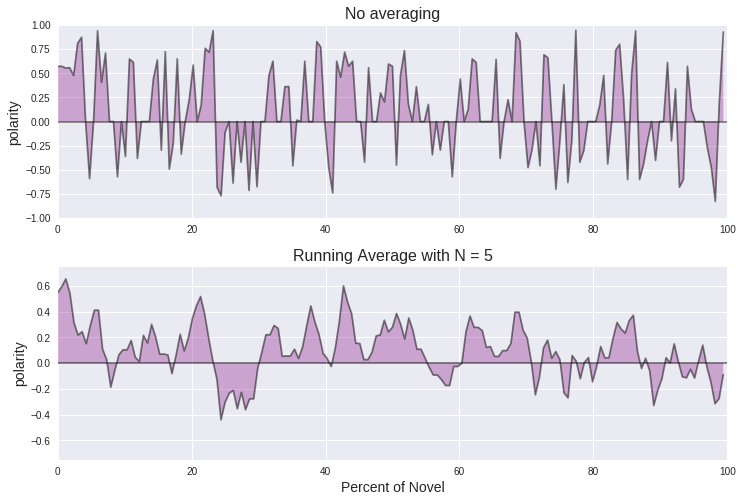

In [10]:
fig = plt.figure(figsize=(12,8))
plt.subplots_adjust(wspace=0.5, hspace=0.25)

plt.subplot(211)
plt.plot(xval, polarity, 'k-', alpha=0.5)
plt.fill_between(xval, 0, polarity, facecolor='purple', alpha=0.3)
plt.axis([0, 100, -1, 1])
plt.axhline(y=0, xmin=0, xmax=100, color='k', alpha=0.5)
plt.ylabel('polarity')
plt.title('No averaging')

plt.subplot(212)
plt.plot(xval_sml, polarity_sml, 'k-', alpha=0.5)
plt.fill_between(xval_sml, 0, polarity_sml, facecolor='purple', alpha=0.3)
plt.axis([0, 100, -0.75, 0.75])
plt.axhline(y=0, xmin=0, xmax=100, color='k', alpha=0.5)
plt.ylabel('polarity')
plt.xlabel('Percent of Novel')
plt.title('Running Average with N = 5')

fig.savefig('happyprince.png', transparent = False, bbox_inches='tight', dpi=100)

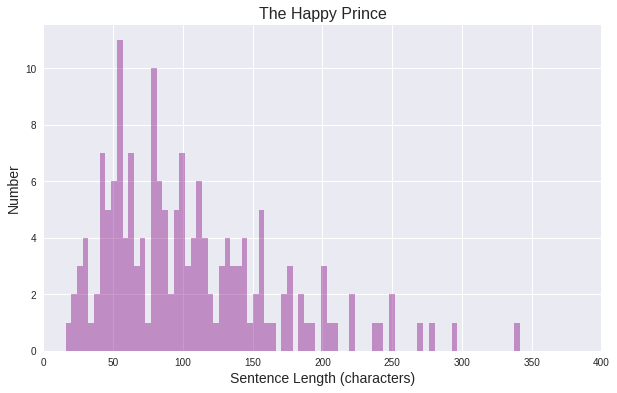

In [11]:
# Make a histogram of sentence lengths (in this case, the number of characters per sentence)
sen_length = [len(sentence) for sentence in sentences]

fig = plt.figure(figsize=(10,6))
plt.hist(sen_length, bins=150, alpha=0.4, color='purple')
plt.xlim(0, 400)
plt.ylabel('Number'), plt.xlabel('Sentence Length (characters)')
plt.title('The Happy Prince')